# Transposition, a bio-inspired operator

In [121]:
from evol_algorithm import *
from statistics import *
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
import seaborn as sns
import matplotlib as mpl

# parameters for plots
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

---
---
---

## RASTRIGIN DIMENSION 12

## Statistics

In [2]:
fs3 = get_data('Results/D12/rastrigin_transposition_3_bea.dat')
fs6 = get_data('Results/D12/rastrigin_transposition_6_bea.dat')
fs9 = get_data('Results/D12/rastrigin_transposition_9_bea.dat')
fs12 = get_data('Results/D12/rastrigin_transposition_12_bea.dat')
fs15 = get_data('Results/D12/rastrigin_transposition_15_bea.dat')
fs18 = get_data('Results/D12/rastrigin_transposition_18_bea.dat')

"""Shapiro-Wilk"""
sw3 = test_normal_sw(fs3)
sw6 = test_normal_sw(fs6)
sw9 = test_normal_sw(fs9)
sw12 = test_normal_sw(fs12)
sw15 = test_normal_sw(fs15)
sw18 = test_normal_sw(fs18)


"""Kolgomorov-Smirnov"""
ks3 = test_normal_ks(fs3)
ks6 = test_normal_ks(fs6)
ks9 = test_normal_ks(fs9)
ks12 = test_normal_ks(fs12)
ks15 = test_normal_ks(fs15)
ks18 = test_normal_ks(fs18)

"""Levene"""
lev = levene((fs3, fs6, fs9, fs12, fs15, fs18))

print('Shapiro-Wilk Test:\n\nFS3:\t%s\nFS6:\t%s\nFS9:\t%s\nFS12:\t%s\nFS15:\t%s\nFS18:\t%s' % (sw3[1], sw6[1], sw9[1], sw12[1], sw15[1], sw18[1]))
print('\nLevene Test: %s' % (lev[1]))

Shapiro-Wilk Test:

FS3:	7.766377818629877e-12
FS6:	8.587105852775334e-12
FS9:	7.848418963340986e-12
FS12:	1.0788290865093586e-06
FS15:	8.708299787940632e-07
FS18:	5.987064177759294e-10

Levene Test: 3.078203095290088e-16


$$p_{value} < 0.05$$
We choose a non-parametric test

## Friedman ANOVA

In [3]:
test = friedman_chi((fs3, fs6, fs9, fs12, fs15, fs18))
print('p-value: ', test[1])

p-value:  3.253294388381572e-23


## Plots

**BAE**

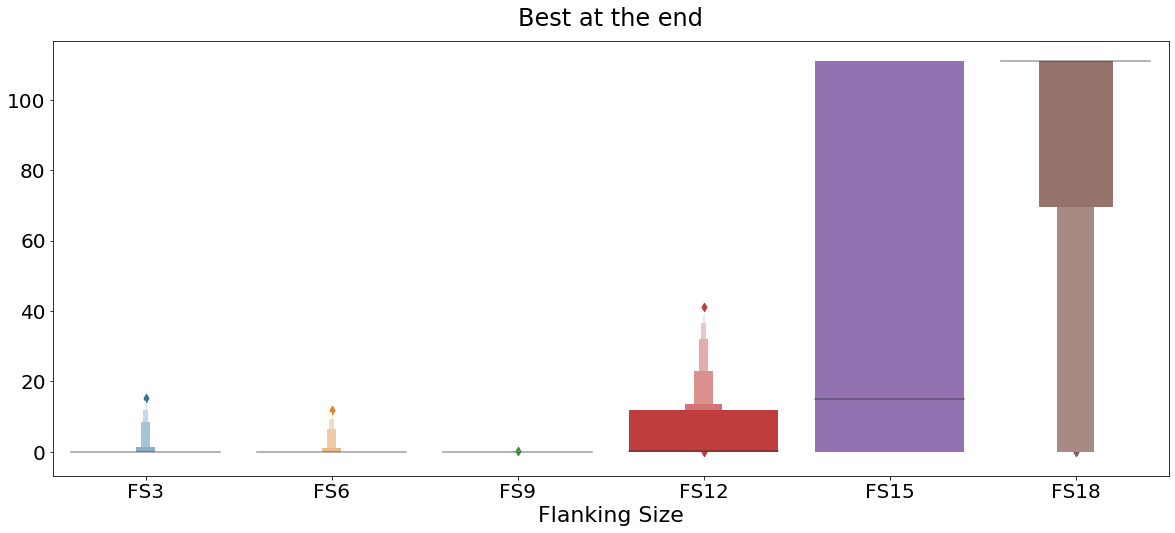

In [98]:
fs3_bea = get_data('Results/D12/rastrigin_transposition_3_bea.dat')
fs6_bea = get_data('Results/D12/rastrigin_transposition_6_bea.dat')
fs9_bea = get_data('Results/D12/rastrigin_transposition_9_bea.dat')
fs12_bea = get_data('Results/D12/rastrigin_transposition_12_bea.dat')
fs15_bea = get_data('Results/D12/rastrigin_transposition_15_bea.dat')
fs18_bea = get_data('Results/D12/rastrigin_transposition_18_bea.dat')



df = pd.DataFrame({'FS3':fs3_bea, 'FS6':fs6_bea, 'FS9':fs9_bea, 'FS12':fs12_bea, 'FS15':fs15_bea, 'FS18':fs18_bea})

ax = sns.boxenplot(data=df)
ax.set_title('Best at the end', pad=15)
ax.set_xlabel('Flanking Size')

plt.savefig('Figure/box_rastrigin_D12.pdf', dpi=700)

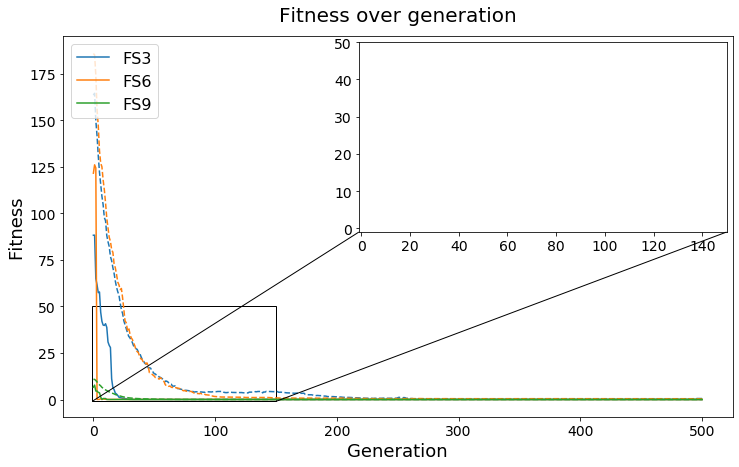

In [126]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(fs3[0], label='FS3', c='tab:blue')
ax.plot(fs3[1], c='tab:blue', linestyle='dashed')

ax.plot(fs6[0], label='FS6', c='tab:orange')
ax.plot(fs6[1], c='tab:orange', linestyle='dashed')

ax.plot(fs9[0], label='FS9', c='tab:green')
ax.plot(fs9[1], c='tab:green', linestyle='dashed')

'''
ax.plot(fs12[0], label='FS12', c='tab:red')
ax.plot(fs12[1], c='tab:red', linestyle='dashed')

ax.plot(fs15[0], label='FS15', c='tab:purple')
ax.plot(fs15[1], c='tab:purple', linestyle='dashed')

ax.plot(fs18[0], label='FS18', c='tab:cyan')
ax.plot(fs18[1], c='tab:cyan', linestyle='dashed')
'''

# zoom
x1, x2, y1, y2 = -1, 150, -1, 50
axins = zoomed_inset_axes(ax, zoom=2, loc=1)
#axins.plot(ax)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
mark_inset(ax, axins, loc1=3, loc2=4);

ax.set_title('Fitness over generation', pad=15)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')

ax.legend(loc='upper left', fontsize=16)
#plt.xlim(0,500)
#plt.ylim(0,10)

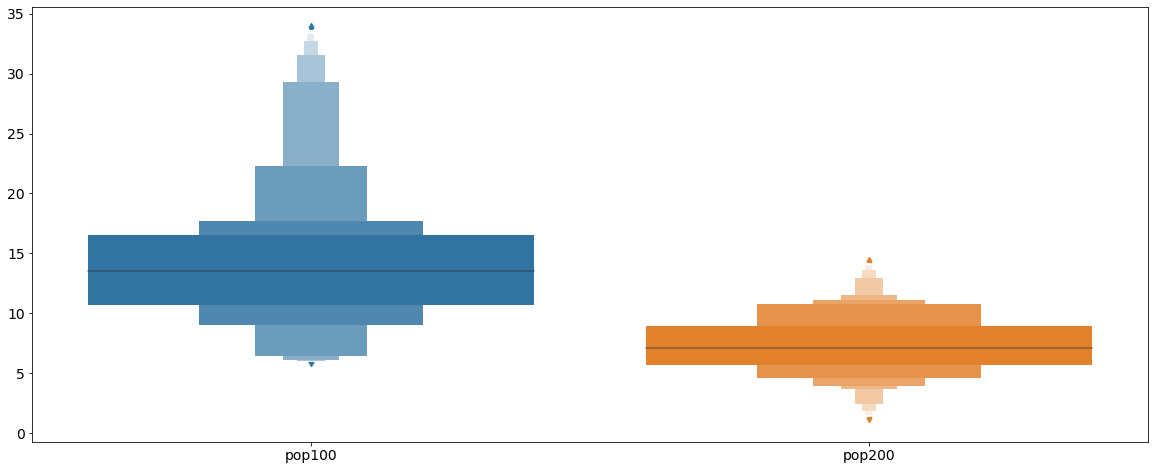

In [129]:
pop100 = get_data('Results/D12/rastrigin_crossover_bea.dat')
pop200 = get_data('Results/D12/rastrigin_crossover_bea_200pop.dat')

#df = pd.DataFrame({'fs3':fs3, 'fs6':fs6, 'fs9':fs9, 'fs12':fs12, 'fs15':fs15, 'fs18':fs18})
df_cross = pd.DataFrame({'pop100':pop100, 'pop200':pop200})
ax = sns.boxenplot(data=df_cross)

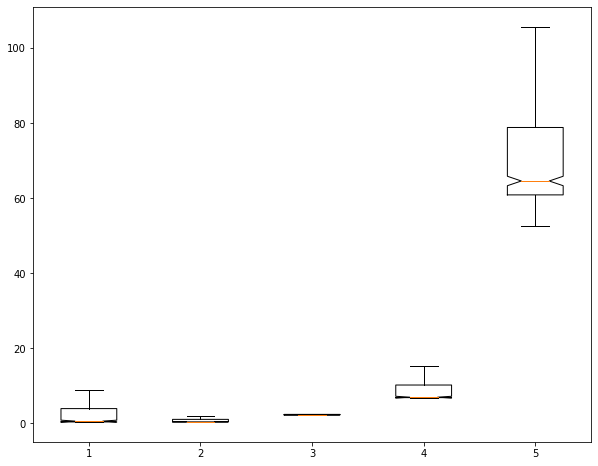

In [98]:
#plt.boxplot([fs3[0], fs6[0],fs9[0],fs12[0], fs15[0]], notch=True);
plt.boxplot([fs3[1], fs6[1], fs9[1], fs12[1], fs15[1]], notch=True, showfliers=False);


## RASTRIGIN DIMENSION 20

(0, 2)

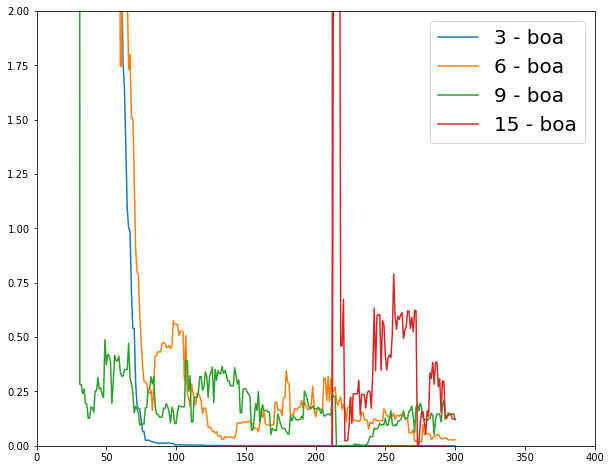

In [8]:
fs3 = get_data('Results/D20/rastrigin_transposition_3_D20.dat')
fs6 = get_data('Results/D20/rastrigin_transposition_6_D20.dat')
fs9 = get_data('Results/D20/rastrigin_transposition_9_D20.dat')
fs12 = get_data('Results/D20/rastrigin_transposition_12_D20.dat')
fs15 = get_data('Results/D20/rastrigin_transposition_15_D20.dat')

plt.rcParams["figure.figsize"] = (10,8)
plt.rc('legend',fontsize=20)

plt.plot(fs3[0], label='3 - boa')
#plt.plot(fs3[1], label='3 - ave')

plt.plot(fs6[0], label='6 - boa')
#plt.plot(fs6[1], label='6 - ave')

plt.plot(fs9[0], label='9 - boa')
#plt.plot(fs9[1], label='9 - ave')

plt.plot(fs12[0], label='12 - boa')
#plt.plot(fs12[1], label='12 - ave')

plt.plot(fs15[0], label='15 - boa')
#plt.plot(fs15[1], label='15 - ave')


plt.legend()
plt.xlim(0,400)
plt.ylim(0,2)